# Mandelbrot Set
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [mandelbrot-set.ipynb](https://github.com/diegoinacio/creative-coding-notebooks/blob/master/Simulation/mandelbrot-set.ipynb)
---
A very basic implementation of [mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) algorithm with some performatic improvements using [Numba](https://numba.pydata.org/).

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from numba import prange, vectorize, int64, float64

Considering $z_0 = 0$ and the constant $c = x + iy$, we can calculate the *mandelbrot set* for each point as:

$$ \large
\begin{aligned}
z_1 & = z_0^2 + c \\
 & = 0^2 + x + iy \\
 & = x + iy \\
z_2 & = z_1^2 + c \\
 & = (x + iy)^2 + x + iy \\
 & = x^2 + i^2y^2 + i2xy + x + iy \\
 & = x^2 - y^2 + x + i(2xy + y) \\
z_{n+1} & = z_n^2+c
\end{aligned} 
$$

In [2]:
@vectorize(
    [float64(float64, float64, int64)],
    target='parallel'
)
def mandelbrot(r, i, iters):
    c = complex(r, i)
    z = 0 + c
    for n in prange(iters):
        if z.real**2 + z.imag**2 > 4:
            return n
        z = z**2 + c
    return 0

def mandelbrot_set(rmin, rmax, imin, imax, iters, size):
    # Build complex plane
    N = size if isinstance(size, complex) else 1j*size
    i, r = np.mgrid[imin:imax:N, rmin:rmax:N].astype(np.float64)
    # Calculate mandelbrot
    MB = mandelbrot(r, i, iters)

    return np.log10(MB + 1)

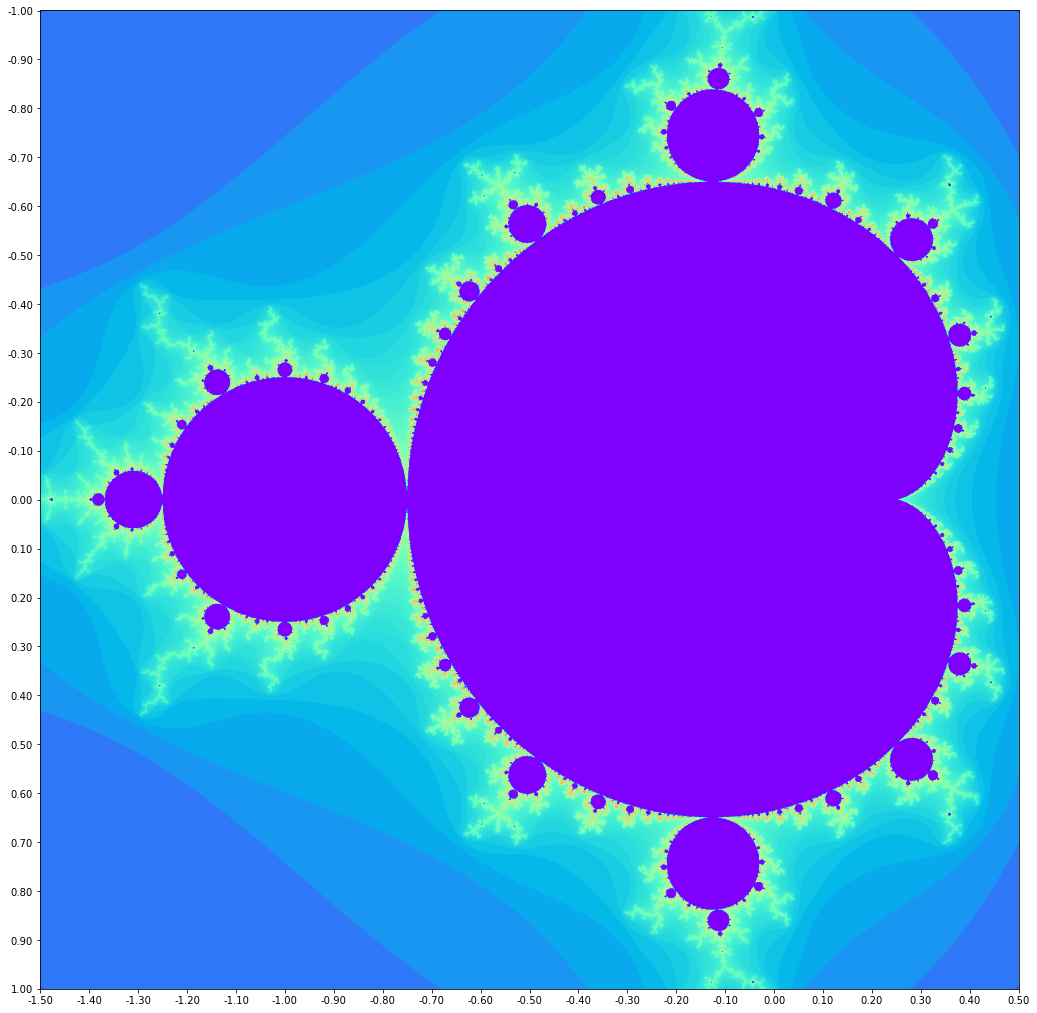

Wall time: 2.18 s


In [3]:
%%time
N = 2048j
rmin, imin, rmax, imax = -1.5, -1, 0.5, 1
mbs = mandelbrot_set(
    rmin, rmax, imin, imax, 1024, N
)

fig, ax = plt.subplots(1, 1, figsize=(18, 18))
plt.imshow(mbs, cmap="rainbow")
plt.xticks(
    np.linspace(0, N.imag, 20 + 1),
    [f'{e:.02f}' for e in np.linspace(rmin, rmax, 20 + 1)])
plt.yticks(
    np.linspace(0, N.imag, 20 + 1),
    [f'{e:.02f}' for e in np.linspace(imin, imax, 20 + 1)])
plt.show()

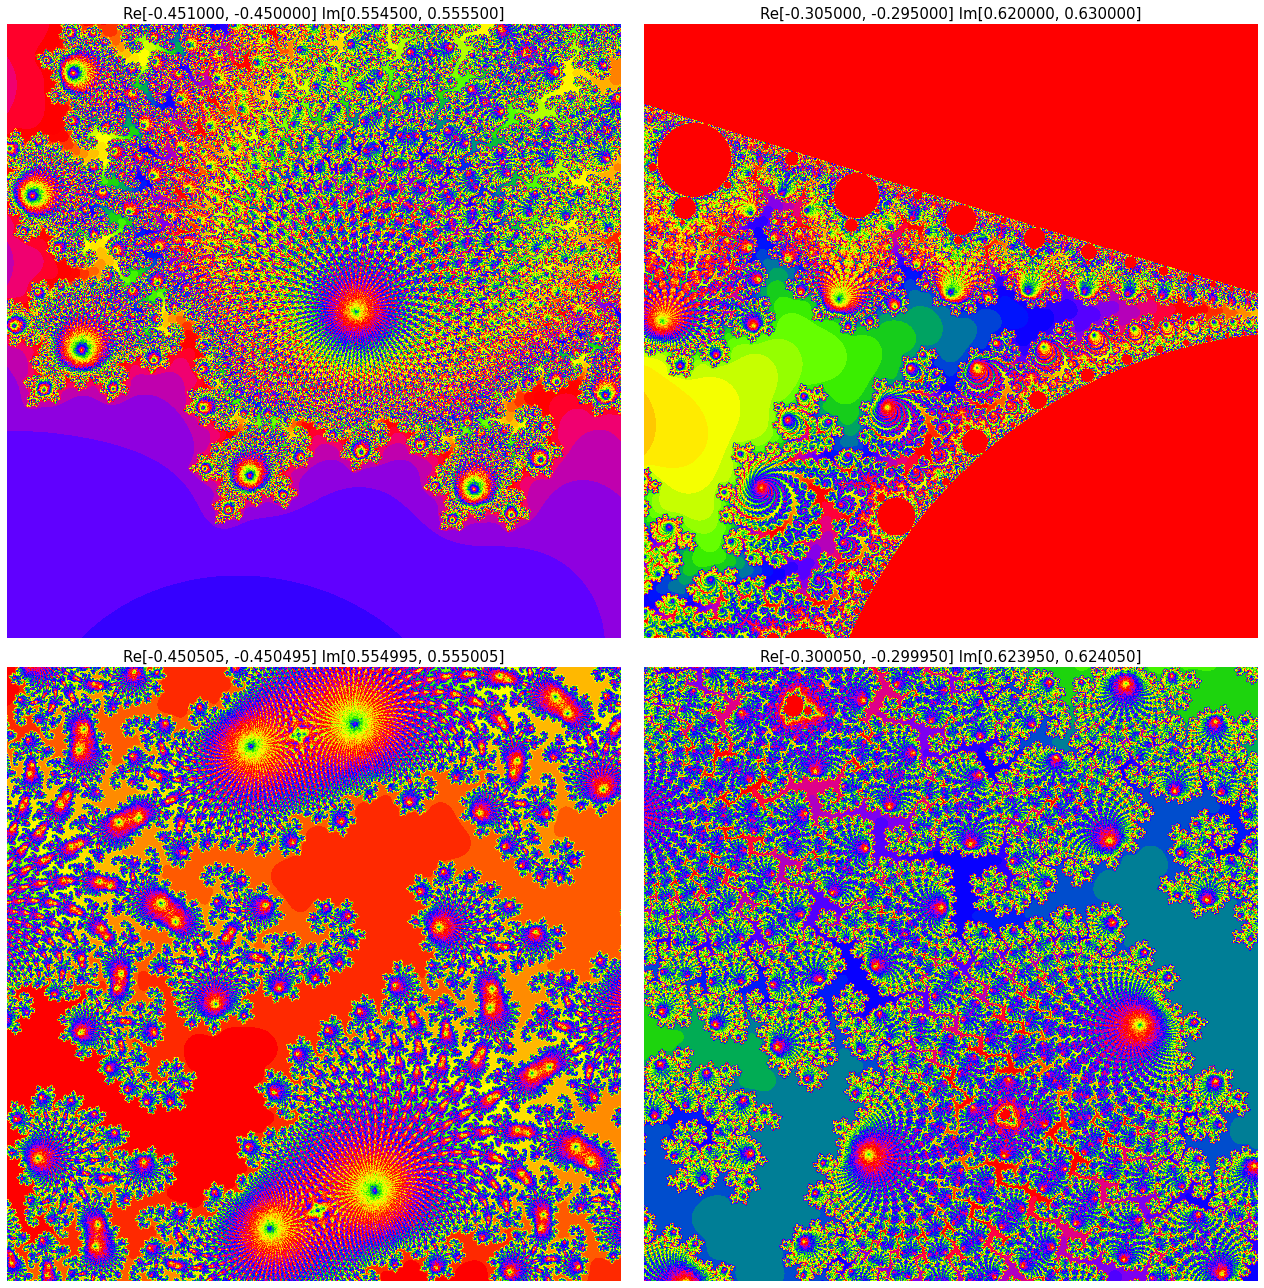

In [4]:
fig, AX = plt.subplots(2, 2, figsize=(18, 18))

center = np.array((-0.4505, 0.555))
side = 0.001
(rmin, imin), (rmax, imax) = center - side/2, center + side/2
mbA = mandelbrot_set(rmin, rmax, imin, imax, 100000, 2048j)
AX[0,0].imshow(mbA, cmap="prism")
AX[0,0].axis("off")
AX[0,0].set_title(
    f'Re[{rmin:.06f}, {rmax:.06f}] Im[{imin:.06f}, {imax:.06f}]',
    fontsize=15
)

center = np.array((-0.3, 0.625))
side = 0.01
(rmin, imin), (rmax, imax) = center - side/2, center + side/2
mbB = mandelbrot_set(rmin, rmax, imin, imax, 100000, 2048j)
AX[0,1].imshow(mbB**0.455, cmap="prism")
AX[0,1].axis("off")
AX[0,1].set_title(
    f'Re[{rmin:.06f}, {rmax:.06f}] Im[{imin:.06f}, {imax:.06f}]',
    fontsize=15
)

center = np.array((-0.4505, 0.555))
side = 0.00001
(rmin, imin), (rmax, imax) = center - side/2, center + side/2
mbC = mandelbrot_set(rmin, rmax, imin, imax, 1000000, 2048j)
AX[1,0].imshow(mbC, cmap="prism")
AX[1,0].axis("off")
AX[1,0].set_title(
    f'Re[{rmin:.06f}, {rmax:.06f}] Im[{imin:.06f}, {imax:.06f}]',
    fontsize=15
)

center = np.array((-0.3, 0.624))
side = 0.0001
(rmin, imin), (rmax, imax) = center - side/2, center + side/2
mbD = mandelbrot_set(rmin, rmax, imin, imax, 1000000, 2048)
AX[1,1].imshow(mbD, cmap="prism")
AX[1,1].axis("off")
AX[1,1].set_title(
    f'Re[{rmin:.06f}, {rmax:.06f}] Im[{imin:.06f}, {imax:.06f}]',
    fontsize=15
)

plt.tight_layout()
plt.show()